<a href="https://colab.research.google.com/github/Roshankumarshridhar/Feature_importance/blob/main/feature_importance_TEM_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Modules

In [ ]:
pip install openpyxl imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 5.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import r2_score, make_scorer
from sklearn.decomposition import PCA
from scipy.spatial.distance import euclidean


Loading DATA

In [21]:
# Load data from Excel file
data = pd.read_excel('/content/drive/MyDrive/roshan/TEM-1/WT_R_S.xlsx')
print(data)

      GROUP   TYPE    A:26-psi    A:26-phi    A:27-psi   A:27-phi   A:28-psi  \
0         S  E104K  127.241354  -75.098540  -62.650572 -39.722024 -37.874813   
1         S  E104K  132.861109  -98.560522  -31.851220 -48.659923 -25.162496   
2         S  E104K  120.901924  -80.540634  -19.461292 -66.487818 -21.550063   
3         S  E104K  131.474034  -81.987868  -39.636361 -45.751893 -28.405002   
4         S  E104K  121.479745  -78.573936  -33.628473 -57.704813 -41.583794   
...     ...    ...         ...         ...         ...        ...        ...   
69995     S     WT  153.478999 -133.998705  133.417426 -65.598156  -2.364675   
69996     S     WT  153.820019 -120.422637  115.354125 -70.821374 -10.729115   
69997     S     WT  137.376687  -77.096703  -33.897390 -72.428754 -32.098487   
69998     S     WT  126.051259  -44.949237  -28.187224 -69.207144 -25.048866   
69999     S     WT  112.781801  -76.927670  -22.084983 -57.454099 -26.028836   

         A:28-phi   A:29-psi   A:29-phi

Grouping the Susceptible and Resistance as 0 and 1

In [25]:
# Map 'S' and 'R' to numerical values for the target variable
data['GROUP'] = data['GROUP'].map({'S': 0, 'R': 1})

balancing

In [23]:
# Split the data into features (X) and target variable (y)
X = data.drop(['GROUP', 'TYPE'], axis=1)
X = X.iloc[:, :-4]
y = data['GROUP']

Normalizing

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the features in X
X_normalized = scaler.fit_transform(X)

# Convert back to DataFrame if needed
X_normalized = pd.DataFrame(X_normalized, columns=X.columns)

print(X_normalized.head())


   A:26-psi  A:26-phi  A:27-psi  A:27-phi  A:28-psi  A:28-phi  A:29-psi  \
0  0.853450  0.290814  0.326072  0.389339  0.396350  0.354144  0.664139   
1  0.869060  0.225552  0.411661  0.364491  0.431928  0.259969  0.596379   
2  0.835840  0.275676  0.446091  0.314928  0.442038  0.260005  0.617419   
3  0.865207  0.271651  0.390027  0.372576  0.422853  0.274625  0.591569   
4  0.837445  0.281147  0.406722  0.339346  0.385970  0.282595  0.638488   

   A:29-phi  A:30-psi  A:30-phi  ...  A:286-psi  A:286-phi  A:287-psi  \
0  0.542730  0.596728  0.320386  ...   0.556046   0.361792   0.492823   
1  0.526030  0.658471  0.376523  ...   0.515322   0.373419   0.495446   
2  0.394325  0.635102  0.448278  ...   0.592771   0.326014   0.529994   
3  0.549371  0.585059  0.419625  ...   0.575260   0.339348   0.581841   
4  0.616842  0.566553  0.386201  ...   0.595311   0.301244   0.583424   

   A:287-phi  A:288-psi  A:288-phi  A:289-psi  A:289-phi  A:290-psi  A:290-phi  
0   0.544998   0.499646   0.4

Normalized DATA

In [24]:
print(X_normalized)
print("Target variable:")
print(y)

       A:26-psi  A:26-phi  A:27-psi  A:27-phi  A:28-psi  A:28-phi  A:29-psi  \
0      0.853450  0.290814  0.326072  0.389339  0.396350  0.354144  0.664139   
1      0.869060  0.225552  0.411661  0.364491  0.431928  0.259969  0.596379   
2      0.835840  0.275676  0.446091  0.314928  0.442038  0.260005  0.617419   
3      0.865207  0.271651  0.390027  0.372576  0.422853  0.274625  0.591569   
4      0.837445  0.281147  0.406722  0.339346  0.385970  0.282595  0.638488   
...         ...       ...       ...       ...       ...       ...       ...   
69995  0.926334  0.126977  0.870927  0.317401  0.495733  0.194502  0.705865   
69996  0.927281  0.164740  0.820731  0.302880  0.472323  0.222877  0.757175   
69997  0.881604  0.285256  0.405975  0.298412  0.412516  0.264304  0.733219   
69998  0.850144  0.374678  0.421843  0.307368  0.432246  0.258599  0.728369   
69999  0.813283  0.285726  0.438800  0.340043  0.429503  0.213166  0.671210   

       A:29-phi  A:30-psi  A:30-phi  ...  A:286-psi

In [26]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_normalized, y)

# Convert back to DataFrame
data_balanced = pd.DataFrame(X_resampled, columns=X.columns)
data_balanced['GROUP'] = y_resampled  # Add back the target column

# Check the new class distribution
print("\nClass distribution after SMOTE:")
print(data_balanced['GROUP'].value_counts())



Class distribution after SMOTE:
GROUP
0    40000
1    40000
Name: count, dtype: int64


<ipython-input-26-dfe519ce4dbf>:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data_balanced['GROUP'] = y_resampled  # Add back the target column


In [28]:
print(X_resampled)
print("Target variable:")
print(y_resampled)

       A:26-psi  A:26-phi  A:27-psi  A:27-phi  A:28-psi  A:28-phi  A:29-psi  \
0      0.853450  0.290814  0.326072  0.389339  0.396350  0.354144  0.664139   
1      0.869060  0.225552  0.411661  0.364491  0.431928  0.259969  0.596379   
2      0.835840  0.275676  0.446091  0.314928  0.442038  0.260005  0.617419   
3      0.865207  0.271651  0.390027  0.372576  0.422853  0.274625  0.591569   
4      0.837445  0.281147  0.406722  0.339346  0.385970  0.282595  0.638488   
...         ...       ...       ...       ...       ...       ...       ...   
79995  0.282607  0.929973  0.352942  0.396586  0.296002  0.427129  0.438670   
79996  0.149118  0.776950  0.285689  0.817846  0.146523  0.674615  0.479692   
79997  0.416912  0.807410  0.321037  0.873719  0.279856  0.509768  0.509486   
79998  0.328033  0.924844  0.291738  0.791379  0.284429  0.479496  0.626864   
79999  0.839547  0.266067  0.404408  0.366307  0.368489  0.319806  0.694543   

       A:29-phi  A:30-psi  A:30-phi  ...  A:286-psi

In [30]:
# Split the balanced data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
print(X_train)
print("Target variable:")
print(y_train)

In [ ]:
# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression R² Score:", lr_r2)

# Support Vector Machine Regression
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_r2 = r2_score(y_test, y_pred_svm)
print("SVM R² Score:", svm_r2)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest R² Score:", rf_r2)


Linear Regression R² Score: 0.824417514087425
SVM R² Score: 0.9446628005225426


## Building Linear Regression model, SVM model, Random forest model

⏰ **This may take some time **


In [ ]:
# Assuming X_normalized and y are your features and target variables
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
lr_r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression R² Score:", lr_r2)

# Support Vector Machine Regression
svm_model = SVR(kernel='rbf')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
svm_r2 = r2_score(y_test, y_pred_svm)
print("SVM R² Score:", svm_r2)

# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest R² Score:", rf_r2)


Linear Regression R² Score: 0.8102888340840895
SVM R² Score: 0.9349271842712209
Random Forest R² Score: 0.9721151366675826


ACCURACY/F1 score/MCC/Recall

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, precision_score, recall_score

# Convert continuous predictions to binary (threshold = 0.5)
y_pred_lr = np.where(lr_model.predict(X_test) > 0.5, 1, 0)
y_pred_svm = np.where(svm_model.predict(X_test) > 0.5, 1, 0)
y_pred_rf = np.where(rf_model.predict(X_test) > 0.5, 1, 0)

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_rf = accuracy_score(y_test, y_pred_rf)

# F1 Score
f1_lr = f1_score(y_test, y_pred_lr)
f1_svm = f1_score(y_test, y_pred_svm)
f1_rf = f1_score(y_test, y_pred_rf)

# MCC
mcc_lr = matthews_corrcoef(y_test, y_pred_lr)
mcc_svm = matthews_corrcoef(y_test, y_pred_svm)
mcc_rf = matthews_corrcoef(y_test, y_pred_rf)

# Precision
precision_lr = precision_score(y_test, y_pred_lr)
precision_svm = precision_score(y_test, y_pred_svm)
precision_rf = precision_score(y_test, y_pred_rf)

# Recall
recall_lr = recall_score(y_test, y_pred_lr)
recall_svm = recall_score(y_test, y_pred_svm)
recall_rf = recall_score(y_test, y_pred_rf)

# Print results
print("Linear Regression - Accuracy:", acc_lr, ", F1 Score:", f1_lr, ", MCC:", mcc_lr, ", Precision:", precision_lr, ", Recall:", recall_lr)
print("SVM - Accuracy:", acc_svm, ", F1 Score:", f1_svm, ", MCC:", mcc_svm, ", Precision:", precision_svm, ", Recall:", recall_svm)
print("Random Forest - Accuracy:", acc_rf, ", F1 Score:", f1_rf, ", MCC:", mcc_rf, ", Precision:", precision_rf, ", Recall:", recall_rf)


Linear Regression - Accuracy: 0.9595714285714285 , F1 Score: 0.9541477640959171 , MCC: 0.9182931337711921 , Precision: 0.9410354745925216 , Recall: 0.9676306276700625
SVM - Accuracy: 0.99 , F1 Score: 0.9884981925731187 , MCC: 0.9796531079130226 , Precision: 0.9884981925731187 , Recall: 0.9884981925731187
Random Forest - Accuracy: 0.9915 , F1 Score: 0.9902178380600082 , MCC: 0.9827033527180249 , Precision: 0.9907879585458135 , Recall: 0.9896483733158068


R square values of the generated ML models




In [ ]:
# Training and test R² scores
train_r2_lr = lr_model.score(X_train, y_train)
test_r2_lr = lr_model.score(X_test, y_test)

train_r2_svm = svm_model.score(X_train, y_train)
test_r2_svm = svm_model.score(X_test, y_test)

train_r2_rf = rf_model.score(X_train, y_train)
test_r2_rf = rf_model.score(X_test, y_test)

print("Linear Regression - Train R²:", train_r2_lr, ", Test R²:", test_r2_lr)
print("SVM - Train R²:", train_r2_svm, ", Test R²:", test_r2_svm)
print("Random Forest - Train R²:", train_r2_rf, ", Test R²:", test_r2_rf)


VISUALIZE

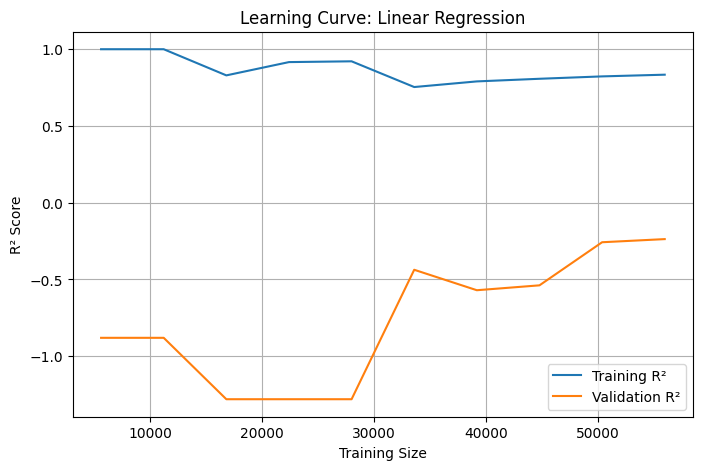

In [ ]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, title):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_normalized, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, label='Training R²')
    plt.plot(train_sizes, test_scores_mean, label='Validation R²')
    plt.title(f'Learning Curve: {title}')
    plt.xlabel('Training Size')
    plt.ylabel('R² Score')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot learning curves for all models
plot_learning_curve(lr_model, "Linear Regression")
plot_learning_curve(svm_model, "SVM")
plot_learning_curve(rf_model, "Random Forest")


In [ ]:
def plot_learning_curve(model, title):
    # Get training and test scores from learning_curve
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_normalized, y, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
    )

    # Compute the mean R² scores
    train_scores_mean = np.clip(train_scores.mean(axis=1), 0, 1)
    test_scores_mean = np.clip(test_scores.mean(axis=1), 0, 1)

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes, train_scores_mean, label='Training R²', marker='o')
    plt.plot(train_sizes, test_scores_mean, label='Validation R²', marker='x')
    plt.ylim(0, 1)  # Ensure y-axis is in the range [0, 1]
    plt.title(f'Learning Curve: {title}')
    plt.xlabel('Training Size')
    plt.ylabel('R² Score (0 to 1)')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# Plot learning curves for all models
plot_learning_curve(lr_model, "Linear Regression")
plot_learning_curve(svm_model, "SVM")
plot_learning_curve(rf_model, "Random Forest")


NameError: name 'learning_curve' is not defined

Recursive feature elimination- Supervised (Uses target variable)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# Initialize the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Number of features to test
num_features_list = list(range(1, X_normalized.shape[1] + 1))  # From 1 to all features
r2_scores = []

# Perform RFE and cross-validation
for num_features in num_features_list:
    rfe = RFE(estimator=rf, n_features_to_select=num_features)
    X_selected = rfe.fit_transform(X_normalized, y)  # Fit RFE and transform X

    # Evaluate R² using cross-validation
    r2 = cross_val_score(rf, X_selected, y, cv=5, scoring='r2').mean()
    r2_scores.append(r2)

# Plot Number of Features vs. R² Score
plt.figure(figsize=(10, 6))
plt.plot(num_features_list, r2_scores, marker='o', linestyle='-')
plt.xlabel("Number of Features")
plt.ylabel("R² Score")
plt.title("Recursive Feature Elimination (RFE) - Features vs. R² Score")
plt.grid(True)
plt.ylim(0, 1)  # R² is between 0 and 1
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Apply RFE to select top 15 features
rfe = RFE(estimator=rf_model, n_features_to_select=15)
rfe.fit(X_normalized, y)

# Get selected features and their ranking
feature_names = X_normalized.columns
selected_features = feature_names[rfe.support_]  # Features marked as important
feature_ranks = rfe.ranking_  # Lower rank means more important

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Ranking': feature_ranks
})

# Select only the top 15 features (rank 1)
top_features = feature_importance_df[feature_importance_df['Ranking'] == 1]

# Plot the top features
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], [1] * len(top_features), color='skyblue')  # RFE only gives rank, not importance
plt.xlabel("Selected Features")
plt.title("Top 15 Features Identified by RFE")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Evaluate model accuracy using cross-validation
accuracy = cross_val_score(rf_model, X_normalized[top_features['Feature']], y, cv=5).mean()
print(f"Model Accuracy after RFE: {accuracy:.2f}")


Feature importance

In [ ]:
# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_normalized, y)

# Get feature importances from the trained Random Forest model
feature_importances = rf_classifier.feature_importances_

Top 15 Variable feature importances (Random forest regressor method)

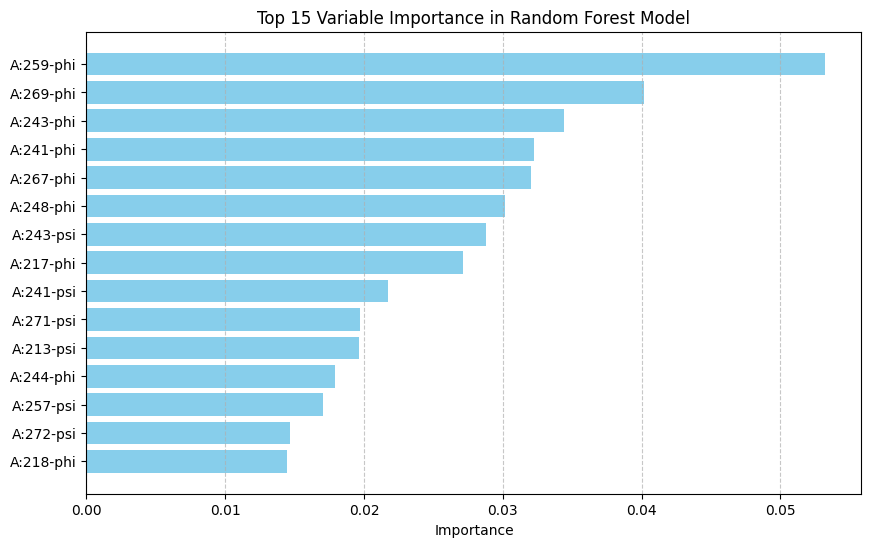

Model Accuracy: 0.92


In [ ]:
# Get the column names (feature names) from the DataFrame
feature_names = X_normalized.columns

# Create a DataFrame for easier sorting and plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by Importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Take the top 15 variables
top_features = feature_importance_df.head(15)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'][::-1], top_features['Importance'][::-1], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 15 Variable Importance in Random Forest Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

# Evaluate model accuracy using cross-validation
accuracy = cross_val_score(rf_classifier, X_normalized, y, cv=5).mean()
print(f"Model Accuracy: {accuracy:.2f}")


BUILDING MODELS WITH ONLY TOP 15 FEATURES

In [ ]:
# Select only the top 15 features
X_top_features = X_normalized[top_features['Feature'].values]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_top_features, y, test_size=0.2, random_state=42)

# Initialize models
lr_model = LinearRegression()
svm_model = SVR(kernel='rbf')
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train and evaluate models
models = {
    "Linear Regression": lr_model,
    "SVM": svm_model,
    "Random Forest": rf_model
}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Calculate R² Score
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} R² Score: {r2:.2f}")

    # Cross-validation accuracy
    accuracy = cross_val_score(model, X_train, y_train, cv=5, scoring='r2').mean()
    print(f"{model_name} Cross-Validation Accuracy (R²): {accuracy:.2f}\n")


Linear Regression R² Score: 0.69
Linear Regression Cross-Validation Accuracy (R²): 0.69

SVM R² Score: 0.75
SVM Cross-Validation Accuracy (R²): 0.74

Random Forest R² Score: 0.82
Random Forest Cross-Validation Accuracy (R²): 0.82



In [ ]:
# Cross-validate R² scores
r2_scores = cross_val_score(rf_classifier, X_normalized, y, cv=5, scoring=make_scorer(r2_score))

print("R² values for each fold:", r2_scores)
print(f"Mean R²: {r2_scores.mean():.2f}")


R² values for each fold: [0.53858333 0.11391667 0.706      0.99970833 1.        ]
Mean R²: 0.67


In [ ]:

# Train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_normalized, y)

# Make predictions
y_pred = cross_val_predict(rf_regressor, X_normalized, y, cv=5)

# Calculate the R^2 score
r2 = r2_score(y, y_pred)
print(f"R² Value: {r2:.2f}")

# Scatter plot of true vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='skyblue', edgecolor='k')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', lw=2)  # Line of perfect prediction
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot of True vs Predicted Values (R²)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


PCA

Explained Variance Ratio of each component:
 [0.66967965 0.01657377 0.00571837 0.0053582  0.00456705 0.00415615
 0.00392306 0.00354799 0.00331949 0.00320716]

Top 10 Features by PCA Importance:
        Feature  Importance
159  A:105-phi    1.303673
389  A:220-phi    1.248447
158  A:105-psi    1.139491
388  A:220-psi    1.135303
452  A:254-psi    1.120578
385  A:218-phi    1.113841
299  A:175-phi    1.108791
175  A:113-phi    1.086016
453  A:254-phi    1.057800
374  A:213-psi    1.011173


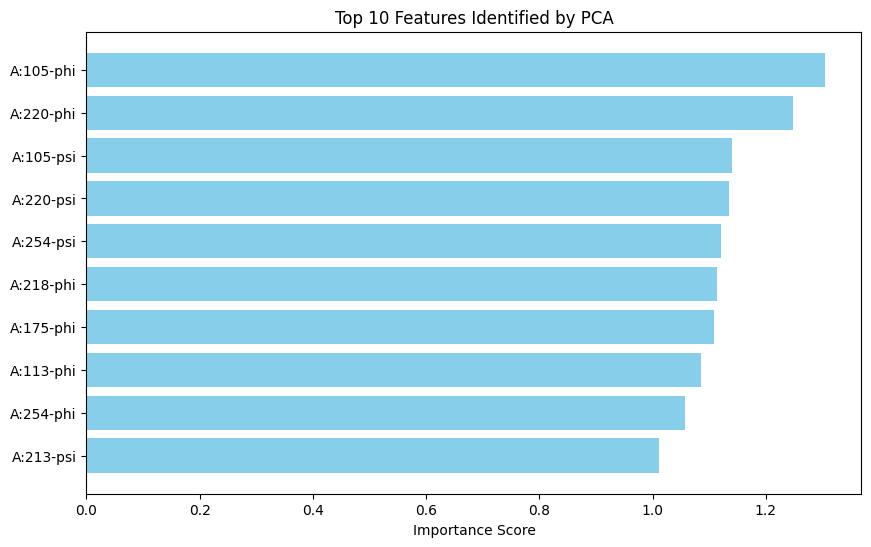

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normalized)  # Ensure features are scaled

# Apply PCA
pca = PCA(n_components=10)  # Choose 10 components
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio of each component:\n", explained_variance)

# Find top 10 contributing features based on PCA loadings
loadings = pca.components_  # Each row is a principal component, columns are original features

# Get absolute values of feature importance
feature_importance = np.abs(loadings).sum(axis=0)

# Rank features by importance
feature_names = X_normalized.columns  # Assuming X_normalized is a Pandas DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top 10 features
top_10_features = feature_importance_df.head(10)
print("\nTop 10 Features by PCA Importance:\n", top_10_features)

# Plot top features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Top 10 Features Identified by PCA")
plt.gca().invert_yaxis()  # To show highest importance at the top
plt.show()


Linear Regression R² Score: 0.1520
Support Vector Machine R² Score: 0.6618
Random Forest R² Score: 0.7457


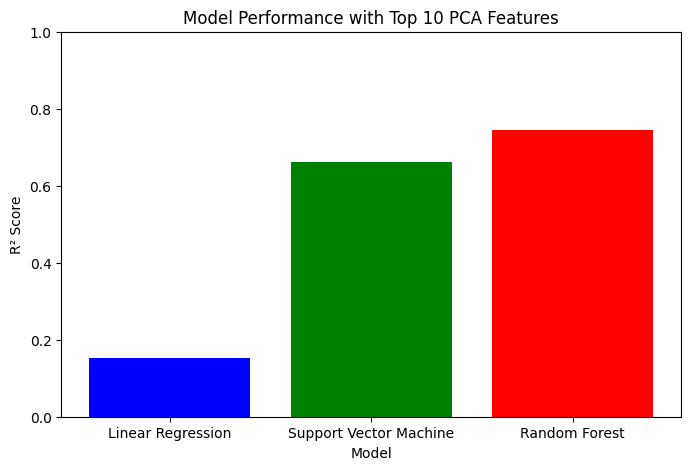

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Standardize the features (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_normalized)  # Ensure features are scaled

# Apply PCA
pca = PCA(n_components=10)  # Choose 10 components
X_pca = pca.fit_transform(X_scaled)

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Find top 10 contributing features based on PCA loadings
loadings = pca.components_  # Each row is a principal component, columns are original features

# Get absolute values of feature importance
feature_importance = np.abs(loadings).sum(axis=0)

# Rank features by importance
feature_names = X_normalized.columns  # Assuming X_normalized is a Pandas DataFrame
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_10_features = feature_importance_df.head(10)['Feature'].tolist()

# Reduce X_normalized to only the top 10 PCA-selected features
X_selected = X_normalized[top_10_features]  # Keep only the important columns

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Machine": SVR(kernel='rbf'),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}

# Store results
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    results[name] = r2
    print(f"{name} R² Score: {r2:.4f}")

# Compare Results
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values(), color=['blue', 'green', 'red'])
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Model Performance with Top 10 PCA Features")
plt.ylim(0, 1)
plt.show()


Frequency distribution

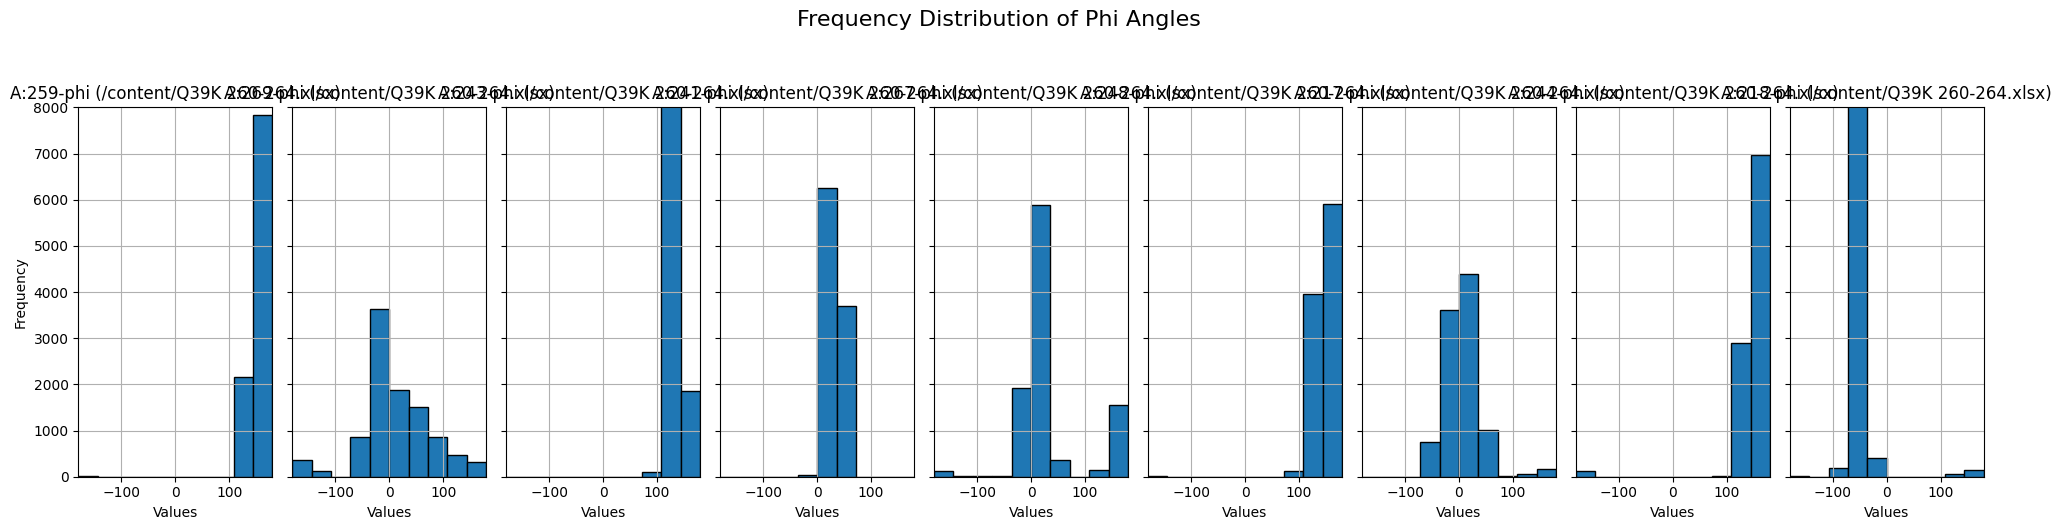

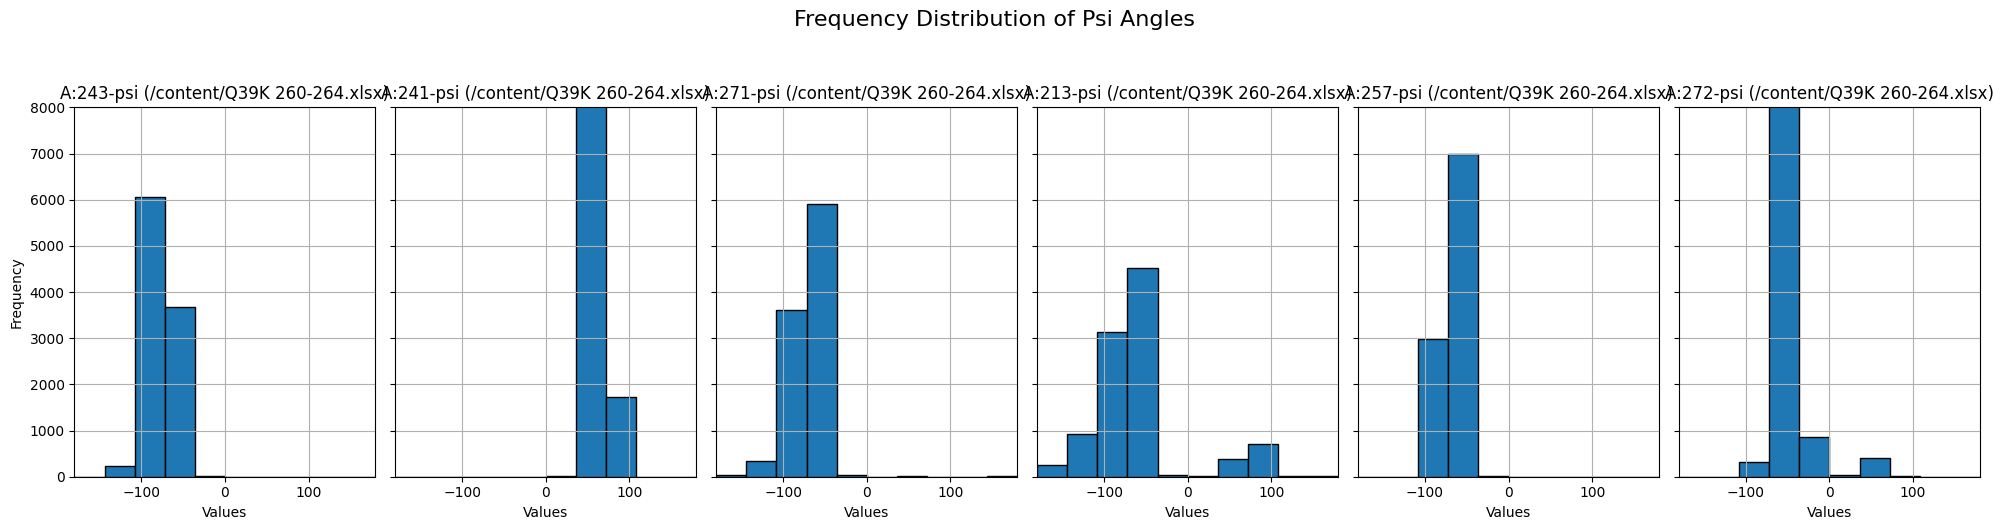

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# List of Excel files
excel_files = ['/content/Q39K 260-264.xlsx']

# Initialize lists to store data for plotting
all_phi_columns = []
all_psi_columns = []

# Loop through each file and read the data
for file in excel_files:
    df = pd.read_excel(file)

    # Extract phi and psi columns
    phi_columns = [col for col in df.columns if 'phi' in col]
    psi_columns = [col for col in df.columns if 'psi' in col]

    all_phi_columns.append((file, phi_columns, df[phi_columns]))
    all_psi_columns.append((file, psi_columns, df[psi_columns]))

# Plot histograms for phi angles
num_rows = len(excel_files)
num_cols = len(all_phi_columns[0][1]) if all_phi_columns[0][1] else 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows), sharey=True)
fig.suptitle('Frequency Distribution of Phi Angles', fontsize=16, y=1.05)

# Ensure axes is always a 2D array for consistent indexing
if num_rows == 1:
    axes = [axes]  # Convert 1D to list for consistency

for i, (file, phi_columns, phi_data) in enumerate(all_phi_columns):
    for j, phi_angle in enumerate(phi_columns):
        axes[i][j].hist(phi_data[phi_angle], bins=10, range=(-180, 180), edgecolor='black')
        axes[i][j].set_title(f'{phi_angle} ({file})')
        axes[i][j].set_xlabel('Values')
        axes[i][j].set_xlim(-180, 180)
        axes[i][j].set_ylim(0, 8000)
        axes[i][j].grid(True)

axes[0][0].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot histograms for psi angles
num_cols = len(all_psi_columns[0][1]) if all_psi_columns[0][1] else 1

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows), sharey=True)
fig.suptitle('Frequency Distribution of Psi Angles', fontsize=16, y=1.05)

if num_rows == 1:
    axes = [axes]  # Convert 1D to list for consistency

for i, (file, psi_columns, psi_data) in enumerate(all_psi_columns):
    for j, psi_angle in enumerate(psi_columns):
        axes[i][j].hist(psi_data[psi_angle], bins=10, range=(-180, 180), edgecolor='black')
        axes[i][j].set_title(f'{psi_angle} ({file})')
        axes[i][j].set_xlabel('Values')
        axes[i][j].set_xlim(-180, 180)
        axes[i][j].set_ylim(0, 8000)
        axes[i][j].grid(True)

axes[0][0].set_ylabel('Frequency')
plt.tight_layout()
plt.show()
